In [ ]:
# Importing necessary libraries
import numpy as np  # For numerical operations and array handling
import pandas as pd  # For data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization

# Enabling inline plotting for Jupyter notebooks
%matplotlib inline

# Importing the OS module to interact with the operating system
import os
# Displaying the files and directories in the current working directory
print(os.listdir())

# Importing the warnings module to control the display of warning messages
import warnings
# Suppressing warning messages for cleaner output
warnings.filterwarnings('ignore')


['.config', 'heart.csv', 'sample_data']


In [ ]:
# Importing various metrics from scikit-learn for model evaluation
from sklearn.metrics import (
    accuracy_score,          # To calculate the accuracy of the model
    f1_score,               # To compute the F1 score, the harmonic mean of precision and recall
    precision_score,        # To calculate the precision of the model
    recall_score,           # To calculate the recall of the model
    confusion_matrix,       # To generate a confusion matrix to evaluate classification results
    roc_auc_score,          # To compute the area under the ROC curve
    log_loss,               # To compute the log loss of the model
    roc_curve,              # To compute the ROC curve
    auc,                    # To compute the area under the curve for ROC
    precision_recall_curve, # To compute precision-recall pairs for different probability thresholds
    average_precision_score  # To compute the average precision score
)


In [ ]:
# Loading the heart disease dataset from a CSV file into a pandas DataFrame
heart_dataset = pd.read_csv("/content/heart.csv")

In [ ]:
# Checking the type of the heart_dataset object
type(heart_dataset)

pandas.core.frame.DataFrame

In [ ]:
# dataset.shape
heart_dataset.shape

(1025, 14)

In [ ]:
#Displaying the first 5 rows of the heart_dataset DataFrame
heart_dataset.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Checking for missing values in the heart_dataset DataFrame
heart_dataset.isnull().sum()  # This will return the count of missing values for each column


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Displaying a summary of the heart_dataset DataFrame
heart_dataset.info()  # This will provide information about the DataFrame, including the number of entries, data types, and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Generating descriptive statistics for the heart_dataset DataFrame and transposing the result
heart_dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [ ]:
# Calculating the correlation matrix for the heart_dataset DataFrame
heart_dataset.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [ ]:
# Calculating the correlation of all features with the 'target' column in the heart_dataset DataFrame
heart_dataset.corr()['target']  # This will return a Series showing the correlation coefficients of all features with the target variable


,target
age,-0.229324
sex,-0.279501
cp,0.434854
trestbps,-0.138772
chol,-0.099966
fbs,-0.041164
restecg,0.134468
thalach,0.422895
exang,-0.438029
oldpeak,-0.438441


In [ ]:
# Calculating the correlation of all features with the 'target' column and sorting the results
heart_dataset.corr()['target'].sort_values()  # This will return a sorted Series of correlation coefficients with the target variable

,target
oldpeak,-0.438441
exang,-0.438029
ca,-0.382085
thal,-0.337838
sex,-0.279501
age,-0.229324
trestbps,-0.138772
chol,-0.099966
fbs,-0.041164
restecg,0.134468


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


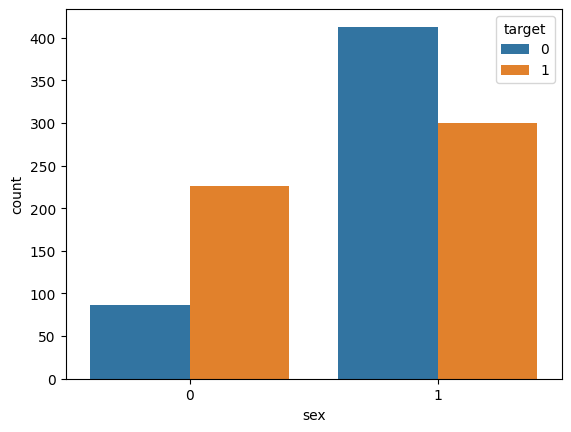

In [ ]:
# Creating a count plot to visualize the distribution of the 'sex' feature in relation to the 'target' variable
sns.countplot(data=heart_dataset, x='sex', hue='target')

# Displaying the heart_dataset DataFrame
heart_dataset


<Axes: >

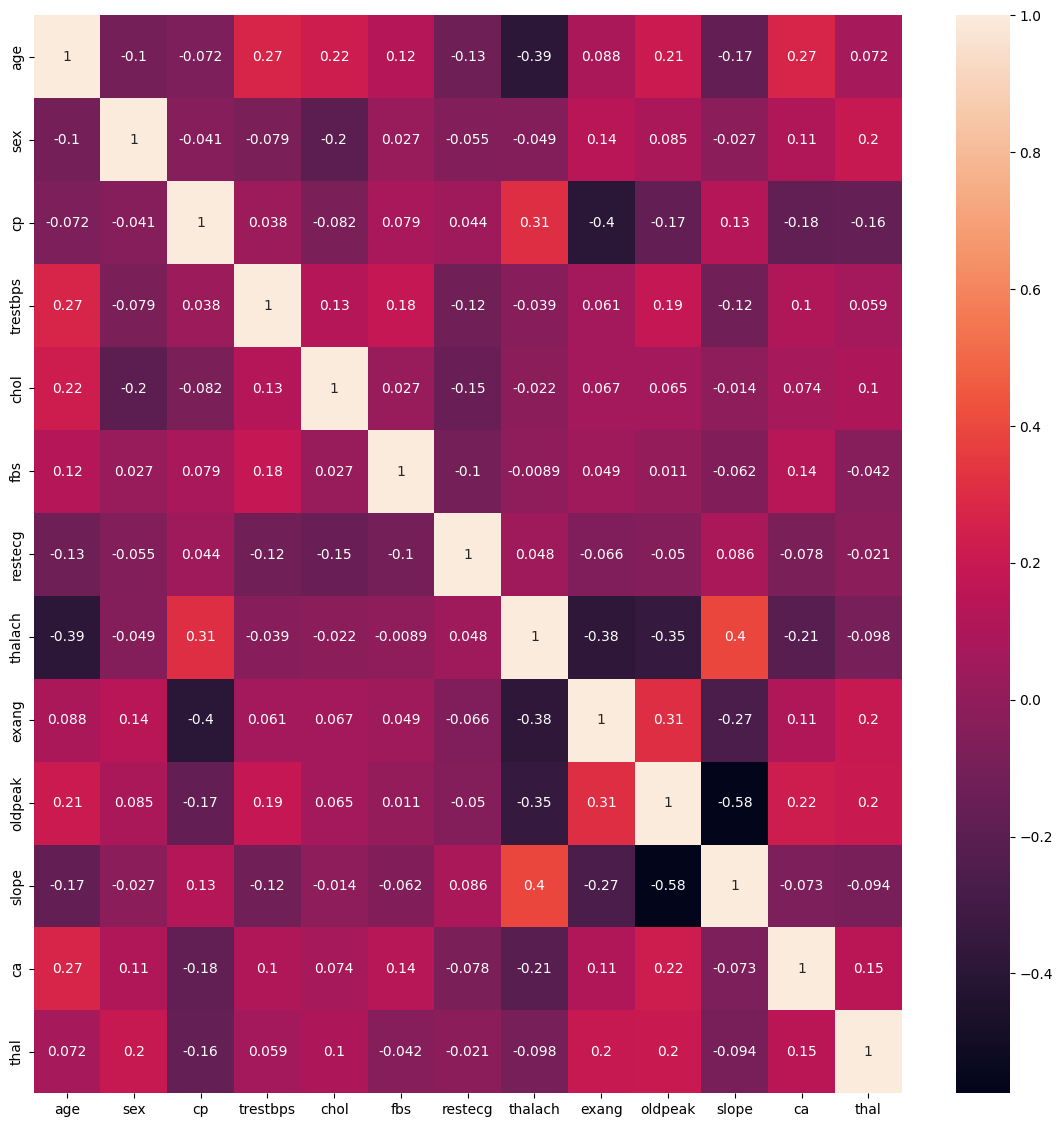

In [ ]:
# Set figure size for the heatmap
plt.figure(figsize=(14, 14))

# Create a heatmap of feature correlations (excluding 'target')
sns.heatmap(heart_dataset.drop('target', axis=1).corr(), annot=True)


<Axes: xlabel='age', ylabel='thalach'>

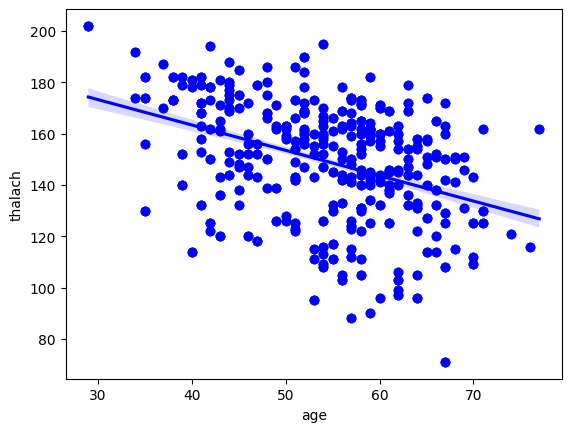

In [ ]:
# Create a regression plot for 'age' vs. 'thalach'
sns.regplot(x='age', y='thalach', data=heart_dataset, color='blue')


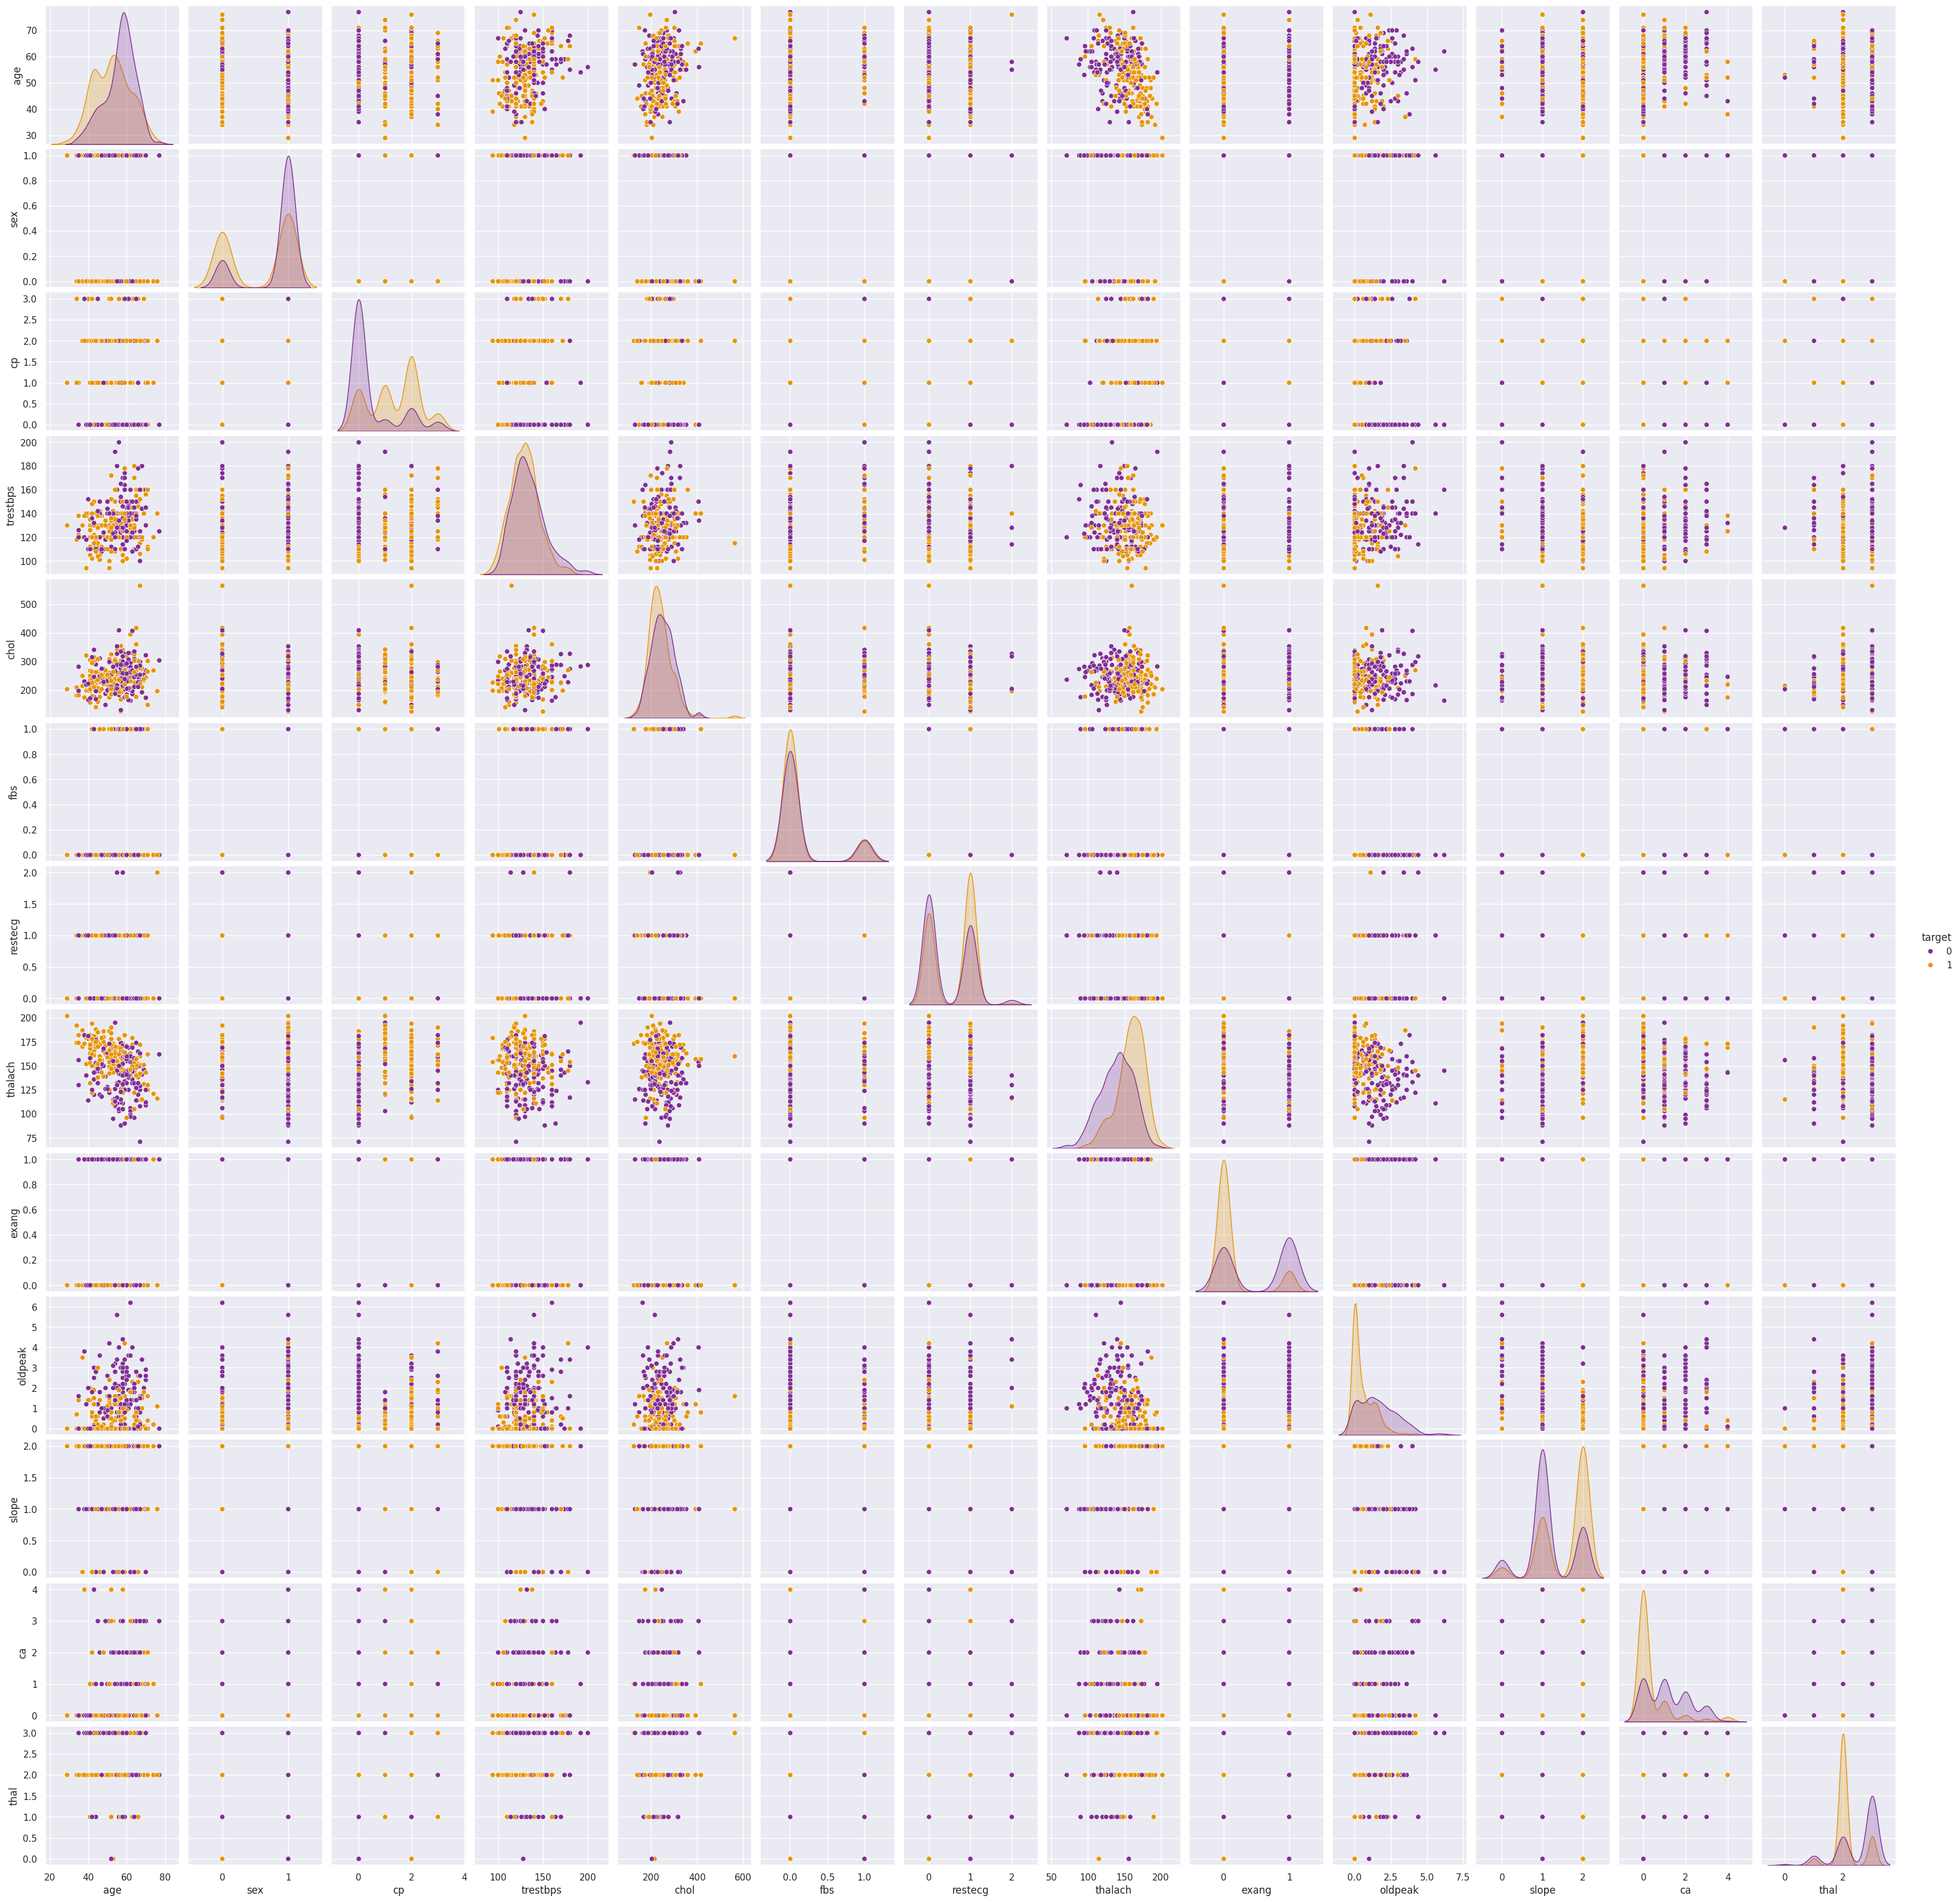

In [ ]:
sns.pairplot(heart_dataset[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']],hue = 'target',palette = 'CMRmap')


In [ ]:
# Get unique values in the 'sex' column
heart_dataset["sex"].unique()


array([1, 0])

<Axes: xlabel='thalach'>

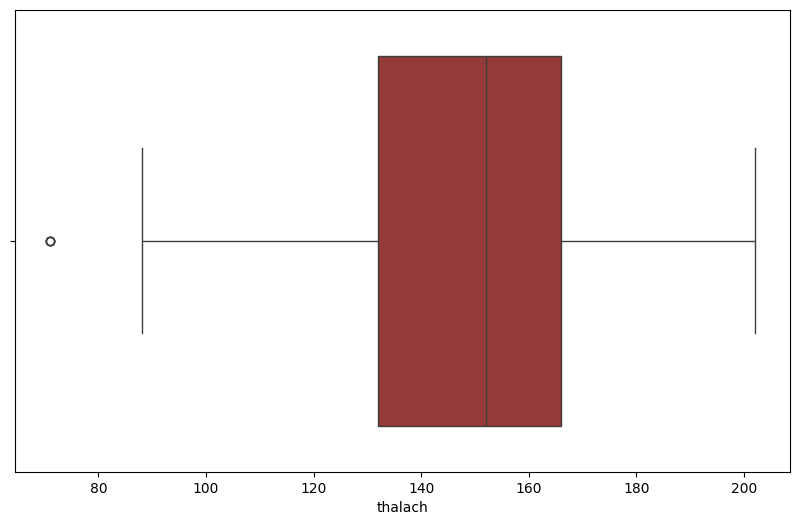

In [ ]:
# Create a box plot for the 'thalach' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=heart_dataset, x='thalach', color='brown')

<Axes: xlabel='age'>

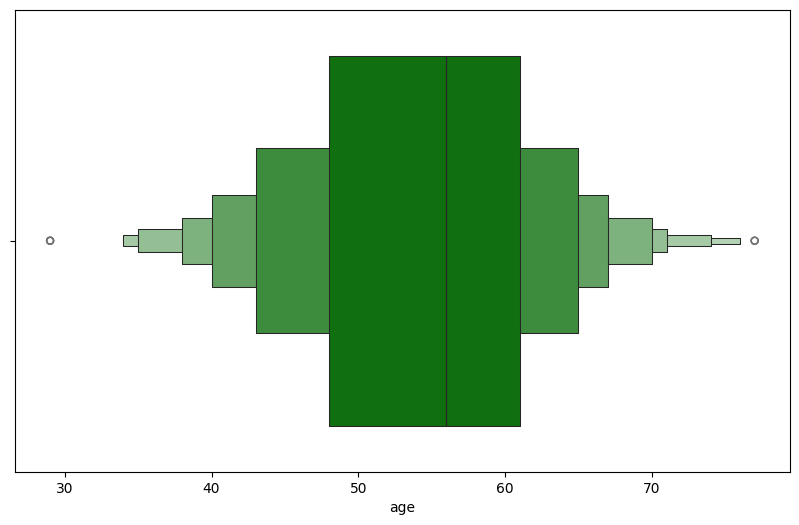

In [ ]:
# Create a boxen plot for the 'age' column
plt.figure(figsize=(10, 6))
sns.boxenplot(data=heart_dataset, x='age', color='green')


In [ ]:
# Split the dataset into features (X) and target (Y)
X = heart_dataset.drop('target', axis=1)  # Features excluding the 'target' column
Y = heart_dataset['target']  # Target variable

In [ ]:
# Display the features (X) and target (Y)
X, Y

(      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0      52    1   0       125   212    0        1      168      0      1.0   
 1      53    1   0       140   203    1        0      155      1      3.1   
 2      70    1   0       145   174    0        1      125      1      2.6   
 3      61    1   0       148   203    0        1      161      0      0.0   
 4      62    0   0       138   294    1        1      106      0      1.9   
 ...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 1020   59    1   1       140   221    0        1      164      1      0.0   
 1021   60    1   0       125   258    0        0      141      1      2.8   
 1022   47    1   0       110   275    0        0      118      1      1.0   
 1023   50    0   0       110   254    0        0      159      0      0.0   
 1024   54    1   0       120   188    0        1      113      0      1.4   
 
       slope  ca  thal  
 0         2   2     3  
 1         0

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((820, 13), (205, 13), (820,), (205,))

In [ ]:
# Import metrics for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Scale the features using Min-Max normalization
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
Scaled_X_train = Scaler.fit_transform(X_train)  # Fit and transform the training data
Scaled_X_test = Scaler.transform(X_test)        # Transform the testing data


In [ ]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()  # Initialize the logistic regression model
Lr.fit(X_train, Y_train)   # Fit the model on the training data
Y_pred_Lr = Lr.predict(X_test)  # Make predictions on the test data


In [ ]:
# Display the predictions made by the logistic regression model
Y_pred_Lr


array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [ ]:
Accuracy_Score_Scaled = round(accuracy_score(Y_pred_Lr, Y_test),2)
F1_Score_scaled = round(f1_score(Y_pred_Lr, Y_test),2)
precision_score_scaled = round(precision_score(Y_pred_Lr, Y_test),2)
recall_score_scaled = round(recall_score(Y_pred_Lr, Y_test),2)

In [ ]:
# Print the evaluation metrics for the logistic regression model
print("Accuracy Score : ", Accuracy_Score_Scaled)      # Output accuracy score
print("F1 Score : ", F1_Score_scaled)                    # Output F1 score
print("Precision Score : ", precision_score_scaled)      # Output precision score
print("Recall Score : ", recall_score_scaled)            # Output recall score


Accuracy Score :  0.79
F1 Score :  0.8
Precision Score :  0.87
Recall Score :  0.74


In [ ]:
# Train a k-nearest neighbors (KNN) classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)  # Initialize the KNN model with 7 neighbors
knn.fit(X_train, Y_train)                    # Fit the model on the training data
Y_pred_knn = knn.predict(X_test)            # Make predictions on the test data


In [ ]:
# Evaluate the performance of the KNN model
Accuracy_Score_Scaled = round(accuracy_score(Y_test, Y_pred_knn), 2)  # Calculate accuracy score
F1_Score_scaled = round(f1_score(Y_test, Y_pred_knn), 2)              # Calculate F1 score
precision_score_scaled = round(precision_score(Y_test, Y_pred_knn), 2)  # Calculate precision score
recall_score_scaled = round(recall_score(Y_test, Y_pred_knn), 2)        # Calculate recall score


In [ ]:
# Print the evaluation metrics for the KNN model
print("Accuracy Score : ", Accuracy_Score_Scaled)      # Output accuracy score
print("F1 Score : ", F1_Score_scaled)                    # Output F1 score
print("Precision Score : ", precision_score_scaled)      # Output precision score
print("Recall Score : ", recall_score_scaled)            # Output recall score


Accuracy Score :  0.68
F1 Score :  0.68
Precision Score :  0.68
Recall Score :  0.68


In [ ]:
# Train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  # Initialize the decision tree with entropy as the criterion
dt.fit(X_train, Y_train)                                            # Fit the model on the training data
Y_pred_dt = dt.predict(X_test)                                    # Make predictions on the test data


In [ ]:
# Evaluate the performance of the decision tree model
Accuracy_Score_Scaled = round(accuracy_score(Y_test, Y_pred_dt), 2)  # Calculate accuracy score
F1_Score_scaled = round(f1_score(Y_test, Y_pred_dt), 2)              # Calculate F1 score
precision_score_scaled = round(precision_score(Y_test, Y_pred_dt), 2)  # Calculate precision score
recall_score_scaled = round(recall_score(Y_test, Y_pred_dt), 2)        # Calculate recall score


In [ ]:
# Print the evaluation metrics for the decision tree model
print("Accuracy Score : ", Accuracy_Score_Scaled)      # Output accuracy score
print("F1 Score : ", F1_Score_scaled)                    # Output F1 score
print("Precision Score : ", precision_score_scaled)      # Output precision score
print("Recall Score : ", recall_score_scaled)            # Output recall score


Accuracy Score :  0.99
F1 Score :  0.99
Precision Score :  1.0
Recall Score :  0.97


In [ ]:
# Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)  # Initialize the random forest with 10 trees
rf.fit(X_train, Y_train)                                                            # Fit the model on the training data
Y_pred_rf = rf.predict(X_test)                                                    # Make predictions on the test data


In [ ]:
Accuracy_Score_Scaled = round(accuracy_score(Y_pred_Lr, Y_test),2)
F1_Score_scaled = round(f1_score(Y_pred_Lr, Y_test),2)
precision_score_scaled = round(precision_score(Y_pred_Lr, Y_test),2)
recall_score_scaled = round(recall_score(Y_pred_Lr, Y_test),2)

In [ ]:
print("Accuracy Score : ",Accuracy_Score_Scaled)
print("F1 Score : ",F1_Score_scaled)
print("Precision Score : ",precision_score_scaled)
print("Recall Score : ",recall_score_scaled)

Accuracy Score :  0.79
F1 Score :  0.8
Precision Score :  0.87
Recall Score :  0.74


In [ ]:
# Train an XGBoost classifier
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)  # Initialize the XGBoost model for binary classification
xgb_model.fit(X_train, Y_train)                                              # Fit the model on the training data

Y_pred_xgb = xgb_model.predict(X_test)                                      # Make predictions on the test data


In [ ]:
# Evaluate the performance of the XGBoost model
Accuracy_Score_Scaled = round(accuracy_score(Y_test, Y_pred_xgb), 2)  # Calculate accuracy score
F1_Score_scaled = round(f1_score(Y_test, Y_pred_xgb), 2)              # Calculate F1 score
precision_score_scaled = round(precision_score(Y_test, Y_pred_xgb), 2)  # Calculate precision score
recall_score_scaled = round(recall_score(Y_test, Y_pred_xgb), 2)        # Calculate recall score


In [ ]:
print("Accuracy Score : ",Accuracy_Score_Scaled)
print("F1 Score : ",F1_Score_scaled)
print("Precision Score : ",precision_score_scaled)
print("Recall Score : ",recall_score_scaled)

Accuracy Score :  0.99
F1 Score :  0.99
Precision Score :  1.0
Recall Score :  0.97


In [ ]:
# Import TensorFlow and Keras for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential      # Import the Sequential model class
from keras.layers import Dense            # Import the Dense layer class


In [ ]:
# Build and train a neural network model using Keras
model = Sequential()                                      # Initialize a sequential model
model.add(Dense(11, activation='relu', input_dim=13))   # Add a hidden layer with 11 neurons and ReLU activation
model.add(Dense(1, activation='sigmoid'))                # Add an output layer with 1 neuron and sigmoid activation

model.compile(loss='binary_crossentropy',                # Compile the model with binary crossentropy loss
              optimizer='adam',                           # Use the Adam optimizer
              metrics=['accuracy'])                       # Track accuracy as a metric
model.fit(X_train, Y_train, epochs=300)                  # Train the model on the training data for 300 epochs



Epoch 1/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5198 - loss: 41.5869
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5327 - loss: 13.0449
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5374 - loss: 4.6813
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6035 - loss: 3.8178
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6333 - loss: 2.9943
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6551 - loss: 2.7629
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6428 - loss: 2.6415
Epoch 8/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6764 - loss: 2.2962
Epoch 9/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6669 - loss: 2.2692
Epoch 10/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6684 - loss: 2.0542
Epoch 11/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6690 - loss: 1.9960
Epoch 12/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accurac

In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)  # Evaluate the model and store loss and accuracy

print(f"Test Loss: {loss:.4f}")           # Print the test loss
print(f"Test Accuracy: {accuracy:.4f}")   # Print the test accuracy


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8166 - loss: 0.4458  
Test Loss: 0.4876
Test Accuracy: 0.7951


In [ ]:
# Display the model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             154 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 500 (1.96 KB)

 Trainable params: 166 (664.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 334 (1.31 KB)

In [ ]:
# Generate predictions for the test dataset
Y_pred_nn = model.predict(X_test)  # Predict the output for the test set


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
# Import and train a Support Vector Machine classifier
from sklearn import svm

svm = svm.SVC(kernel='linear')   # Initialize SVM with a linear kernel
svm.fit(X_train, Y_train)        # Fit the model on the training data
Y_pred_svm = svm.predict(X_test) # Predict the target variable for the test data


In [ ]:
# Evaluate the performance of the SVM model
Accuracy_Score_Scaled = round(accuracy_score(Y_test, Y_pred_svm), 2)  # Calculate accuracy score
F1_Score_scaled = round(f1_score(Y_test, Y_pred_svm), 2)              # Calculate F1 score
precision_score_scaled = round(precision_score(Y_test, Y_pred_svm), 2)  # Calculate precision score
recall_score_scaled = round(recall_score(Y_test, Y_pred_svm), 2)        # Calculate recall score


In [ ]:
# Print the evaluation metrics for the SVM model
print("Accuracy Score: ", Accuracy_Score_Scaled)        # Output the accuracy score
print("F1 Score: ", F1_Score_scaled)                      # Output the F1 score
print("Precision Score: ", precision_score_scaled)        # Output the precision score
print("Recall Score: ", recall_score_scaled)              # Output the recall score


Accuracy Score:  0.8
F1 Score:  0.82
Precision Score:  0.76
Recall Score:  0.9


In [ ]:
# Import and train a Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()                 # Initialize the Naive Bayes classifier
nb.fit(X_train, Y_train)         # Fit the model on the training data
Y_pred_nb = nb.predict(X_test)   # Predict the target variable for the test data


In [ ]:
Accuracy_Score_Scaled = round(accuracy_score(Y_pred_Lr, Y_test),2)
F1_Score_scaled = round(f1_score(Y_pred_Lr, Y_test),2)
precision_score_scaled = round(precision_score(Y_pred_Lr, Y_test),2)
recall_score_scaled = round(recall_score(Y_pred_Lr, Y_test),2)

In [ ]:
# Print the evaluation metrics for the GaussianNB model
print("Accuracy Score : ",Accuracy_Score_Scaled)
print("F1 Score : ",F1_Score_scaled)
print("Precision Score : ",precision_score_scaled)
print("Recall Score : ",recall_score_scaled)

Accuracy Score :  0.79
F1 Score :  0.8
Precision Score :  0.87
Recall Score :  0.74


In [ ]:
# Store evaluation scores and algorithm names
scores = [Accuracy_Score_Scaled, F1_Score_scaled, precision_score_scaled, recall_score_scaled]  # List of scores
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine",  # List of algorithms
              "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost",
              "Neural Network"]


# for i in range(len(algorithms)):
#     print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

8 8


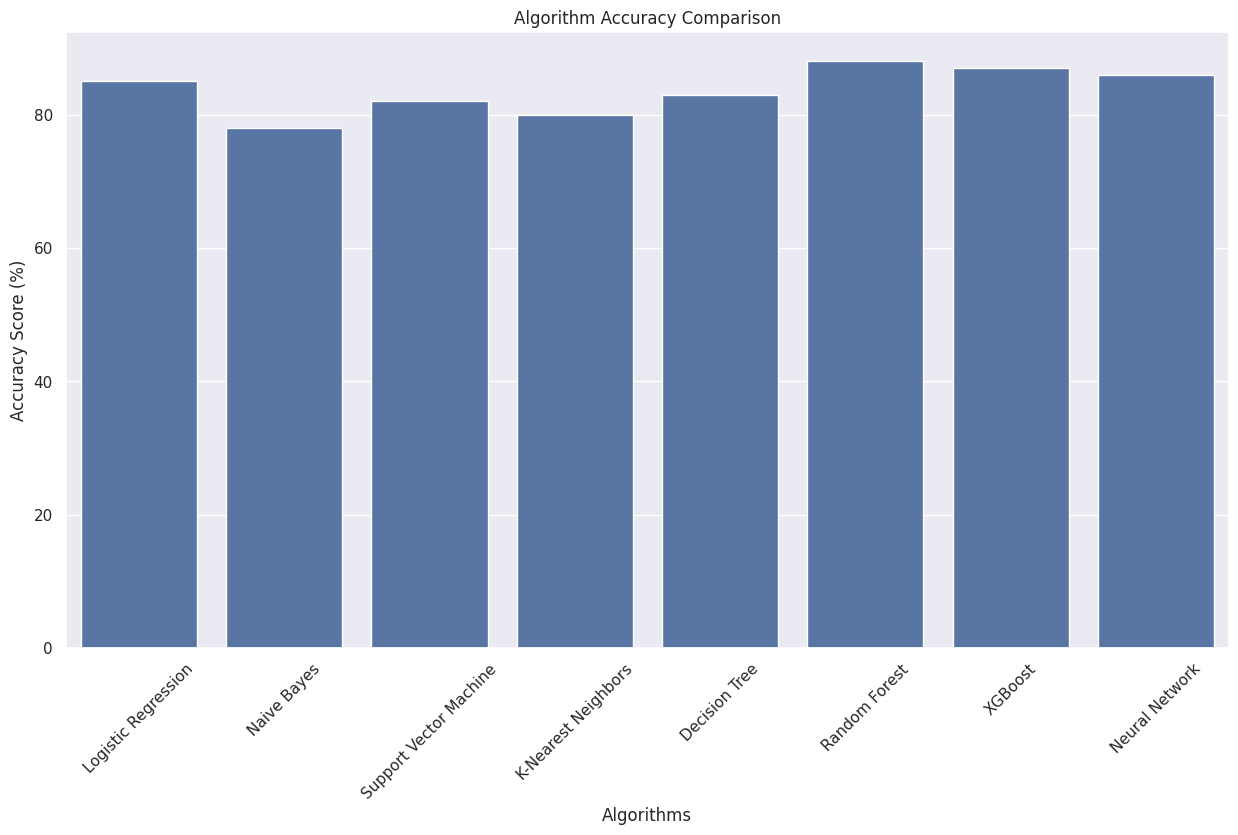

In [ ]:
# List of algorithms
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine",
              "K-Nearest Neighbors", "Decision Tree", "Random Forest",
              "XGBoost", "Neural Network"]

#Corresponding accuracy scores (replace with your actual computed scores)
score_lr = 0.85
score_nb = 0.78
score_svm = 0.82
score_knn = 0.80
score_dt = 0.83
score_rf = 0.88
score_xgb = 0.87
score_nn = 0.86

#Compile the scores list
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn]

# Confirm lengths match
print(len(algorithms), len(scores))  # Both should print "8"

# Plotting the accuracy scores
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,8)})  # Set figure size
plt.xlabel("Algorithms")                 # X-axis label
plt.ylabel("Accuracy Score (%)")         # Y-axis label
sns.barplot(x=algorithms, y=[s * 100 for s in scores])  # Create a bar plot
plt.title("Algorithm Accuracy Comparison")  # Add a title
plt.xticks(rotation=45)                  # Rotate x-axis labels for better visibility
plt.show()                                # Display the plot
